# How does the temperature change the models response?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from langchain.embeddings import HuggingFaceEmbeddings # Embedding text to vectors

In [3]:
numResponses = 5
# assemble files
dfExp = pd.DataFrame()
for i in range(21):
    temp = i / 20
    NORAGFile = 'EX-11-JUNE-2024-NO-RAG-TEMP-llama2-7b-temp-' + str(temp) + '.csv'
    RAGFile   = 'EX-12-JUNE-2024-RAG-TEMP-llama2-7b-temp-' + str(temp) + '.csv'
    dfRagTemp = pd.read_csv(RAGFile)
    dfNoRagTemp = pd.read_csv(NORAGFile)
    dfRagTemp['temp'] = temp
    dfNoRagTemp['temp'] = temp
    dfRagTemp['rag'] = True
    dfNoRagTemp['rag'] = False
    dfExp = pd.concat([dfExp, dfRagTemp, dfNoRagTemp], ignore_index=True)


In [18]:
embedder = HuggingFaceEmbeddings(model_name='BAAI/bge-base-en-v1.5')
def cosine_sim(doc1, doc2, embedderModel=embedder):
    doc1 = np.array(embedderModel.embed_query(doc1))
    doc2 = np.array(embedderModel.embed_query(doc2))
    dotprod = np.dot(doc1, doc2)
    doc1norm = np.linalg.norm(doc1)
    doc2norm = np.linalg.norm(doc2)
    return (dotprod / (doc1norm*doc2norm))

/home/jpic/.local/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


# At different temps. how does the similarity of input to output change for rag v. no rag

In [33]:
temps = [] # Measured temp
rags   = [] # if rag is used in a response
IOSim = [] # similaries between each input output pair

for temp, dfTemp in dfExp.groupby('temp'):
    print(f"Processing group with temp = {temp}")
    for rag, dfTempRag in dfTemp.groupby('rag'):
        for prompt, dfTempRagPrompt in dfTempRag.groupby('prompt'):
            for rep in range(5):
                response = dfTempPrompt['response-' + str(rep)].values
                if len(response) > 1:
                    print('Warning')
                else:
                    response = response[0]
                temps.append(temp)
                rags.append(rag)
                IOSim.append(cosine_sim(prompt, response))
            print(len(IOSim))

Processing group with temp = 0.0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800
805
810
815
820
825
830
835
840
845
850
855
860
865
870
875
880
885
890
895
900
905
910
915
920
925
930
935
940
945
950
955
960
965
970
975
980
985
990
995
1000
1005
1010
1015
1020
1025
1030
1035
1040
1045
1050
1055
1060
1065
1070
1075
1080
1085
1090
1095
1100
1105
1110
1115
1120
1125
1130
1135
1140
1145
1150
1155
1160
1165
1170
1175
1180
1185
1

In [34]:
dfDict = {'Temperature': temps, 'RAG': rags, 'Similarity':IOSim}
dfRes = pd.DataFrame(dfDict)

In [36]:
dfRes.to_csv('EX-11-12-JUNE-2024-TEMP-llama2-7b-resonse2promptSimilarity.csv')

<Axes: xlabel='Temperature', ylabel='Similarity'>

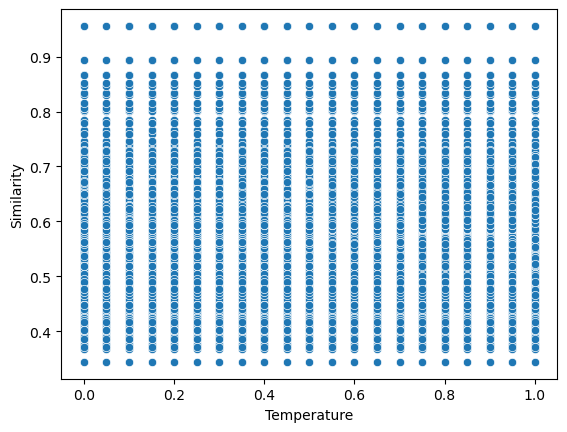

In [37]:
sns.scatterplot(data=dfRes,
                x   = 'Temperature',
                y   = 'Similarity')

<Axes: xlabel='Similarity', ylabel='Count'>

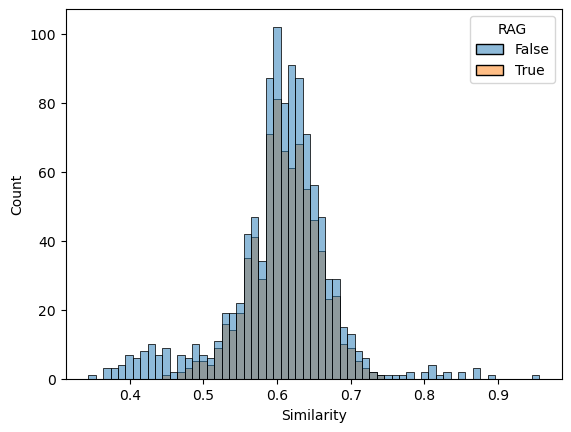

In [42]:
dfResT0 = dfRes[dfRes['Temperature'] == 0]
sns.histplot(data=dfResT0,
             x = 'Similarity',
             hue = 'RAG')

<Axes: xlabel='Similarity', ylabel='Count'>

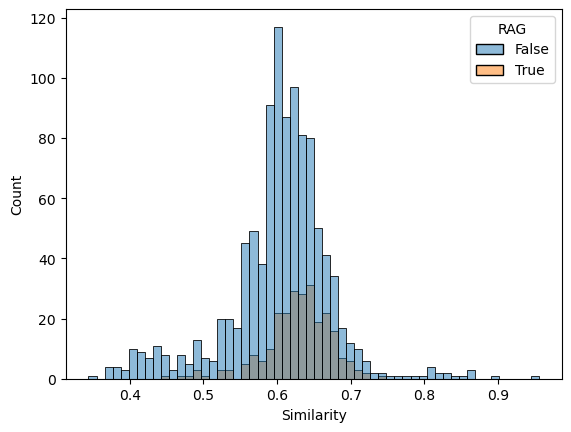

In [41]:
dfResT0 = dfRes[dfRes['Temperature'] == 1]
sns.histplot(data=dfResT0,
             x = 'Similarity',
             hue = 'RAG')

# How do the response similarities change at different temps?

In [28]:
embedder = HuggingFaceEmbeddings(model_name='BAAI/bge-base-en-v1.5')

def cosineSim(doc1, doc2):
    dotprod = np.dot(doc1, doc2)
    doc1norm = np.linalg.norm(doc1)
    doc2norm = np.linalg.norm(doc2)
    return (dotprod / (doc1norm*doc2norm))

def cosine_sim(docs, embedderModel=embedder):
    docVecs = []
    for doc in docs:
        docVecs.append(np.array(embedderModel.embed_query(doc)))
    cosSim = []
    for i in range(len(docVecs)):
        for j in range(i+1, len(docVecs)):
            cosSim.append(cosineSim(docVecs[i], docVecs[j]))
    return cosSim

/home/jpic/.local/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [41]:
temps = [] # Measured temp
rags   = [] # if rag is used in a response
responseSimilarity = [] # similaries between each input output pair

for temp, dfTemp in dfExp.groupby('temp'):
    print(f"Processing group with temp = {temp}")
    for rag, dfTempRag in dfTemp.groupby('rag'):
        random_prompts = np.random.choice(dfTempRag['prompt'].unique(), size=100, replace=False)
        for prompt in random_prompts:
            dfTempRagPrompt = dfTempRag[dfTempRag['prompt'] == prompt]
            responses = []
            for rep in range(5):
                response = dfTempRagPrompt['response-' + str(rep)].values
                responses.append(response[0])
            responseSimilarity.append(cosine_sim(responses))
            rags.append(rag)
            temps.append(temp)
#           print(len(responses))

Processing group with temp = 0.0
Processing group with temp = 0.05
Processing group with temp = 0.1
Processing group with temp = 0.15
Processing group with temp = 0.2
Processing group with temp = 0.25
Processing group with temp = 0.3
Processing group with temp = 0.35
Processing group with temp = 0.4
Processing group with temp = 0.45
Processing group with temp = 0.5
Processing group with temp = 0.55
Processing group with temp = 0.6
Processing group with temp = 0.65
Processing group with temp = 0.7
Processing group with temp = 0.75
Processing group with temp = 0.8
Processing group with temp = 0.85
Processing group with temp = 0.9
Processing group with temp = 0.95
Processing group with temp = 1.0


In [44]:
dfRes = pd.DataFrame(responseSimilarity)
dfRes.columns = ['Rep-' + str(i) for i in dfRes.columns]
dfRes['avgSim'] = dfRes.mean(axis=1)
dfRes['Temperature'] = temps
dfRes['RAG'] = rags
dfRes

,Rep-0,Rep-1,Rep-2,Rep-3,Rep-4,Rep-5,Rep-6,Rep-7,Rep-8,Rep-9,avgSim,Temperature,RAG
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,False
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,False
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,False
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,False
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,0.888589,0.933123,0.952838,0.946978,0.864765,0.907107,0.901762,0.946330,0.937187,0.980275,0.925895,1.0,True
4196,0.930771,0.887143,0.950940,0.927422,0.878602,0.934163,0.930223,0.877295,0.855930,0.964541,0.913703,1.0,True
4197,0.902154,0.934710,0.918262,0.942037,0.884635,0.904813,0.918837,0.927077,0.923732,0.910155,0.916641,1.0,True
4198,0.944924,0.911474,0.869274,0.929835,0.926082,0.893883,0.920602,0.894522,0.943320,0.870584,0.910450,1.0,True


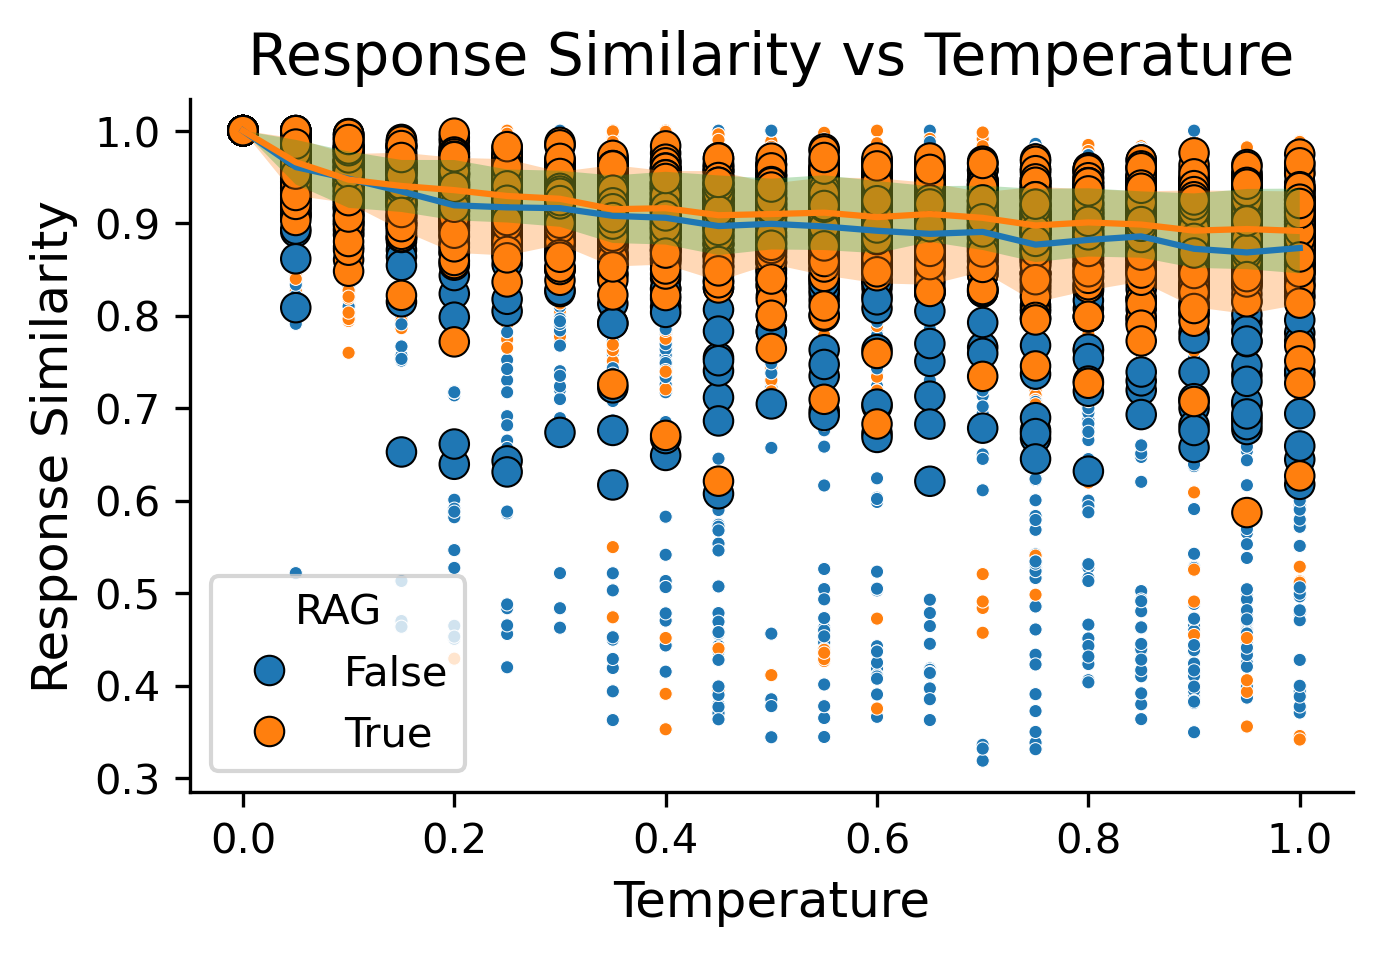

In [52]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=300)
for i in range(10):
    sns.scatterplot(data=dfRes,
                    x='Temperature',
                    y='Rep-' + str(i),
                    s=10,
                    hue='RAG',
                    legend=False,
                    ax=ax)
sns.scatterplot(data=dfRes,
                x='Temperature',
                y='avgSim',
                s=50,
                hue='RAG',
                edgecolor='k',
                linewidth=0.5,
                ax=ax)
agg_df = dfRes.groupby(['Temperature', 'RAG']).agg(
    mean_avgSim=('avgSim', 'mean'),
    sem_avgSim=('avgSim', 'std')  # Standard Error of the Mean
).reset_index()
for rag in dfRes['RAG'].unique():
    rag_df = agg_df[agg_df['RAG'] == rag]
    ax.plot(rag_df['Temperature'], rag_df['mean_avgSim'], label=f'Mean RAG {rag}')
    ax.fill_between(rag_df['Temperature'], 
                    rag_df['mean_avgSim'] - rag_df['sem_avgSim'], 
                    rag_df['mean_avgSim'] + rag_df['sem_avgSim'], 
                    alpha=0.3)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:2], labels=labels[:2], title='RAG')
sns.despine()
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Response Similarity', fontsize=12)
plt.title('Response Similarity vs Temperature', fontsize=14)
plt.show()

In [58]:
df_melted = pd.melt(dfRes, 
                    id_vars=['Temperature', 'RAG', 'avgSim'], 
                    value_vars=[f'Rep-{i}' for i in range(10)], 
                    var_name='Rep', 
                    value_name='Error')

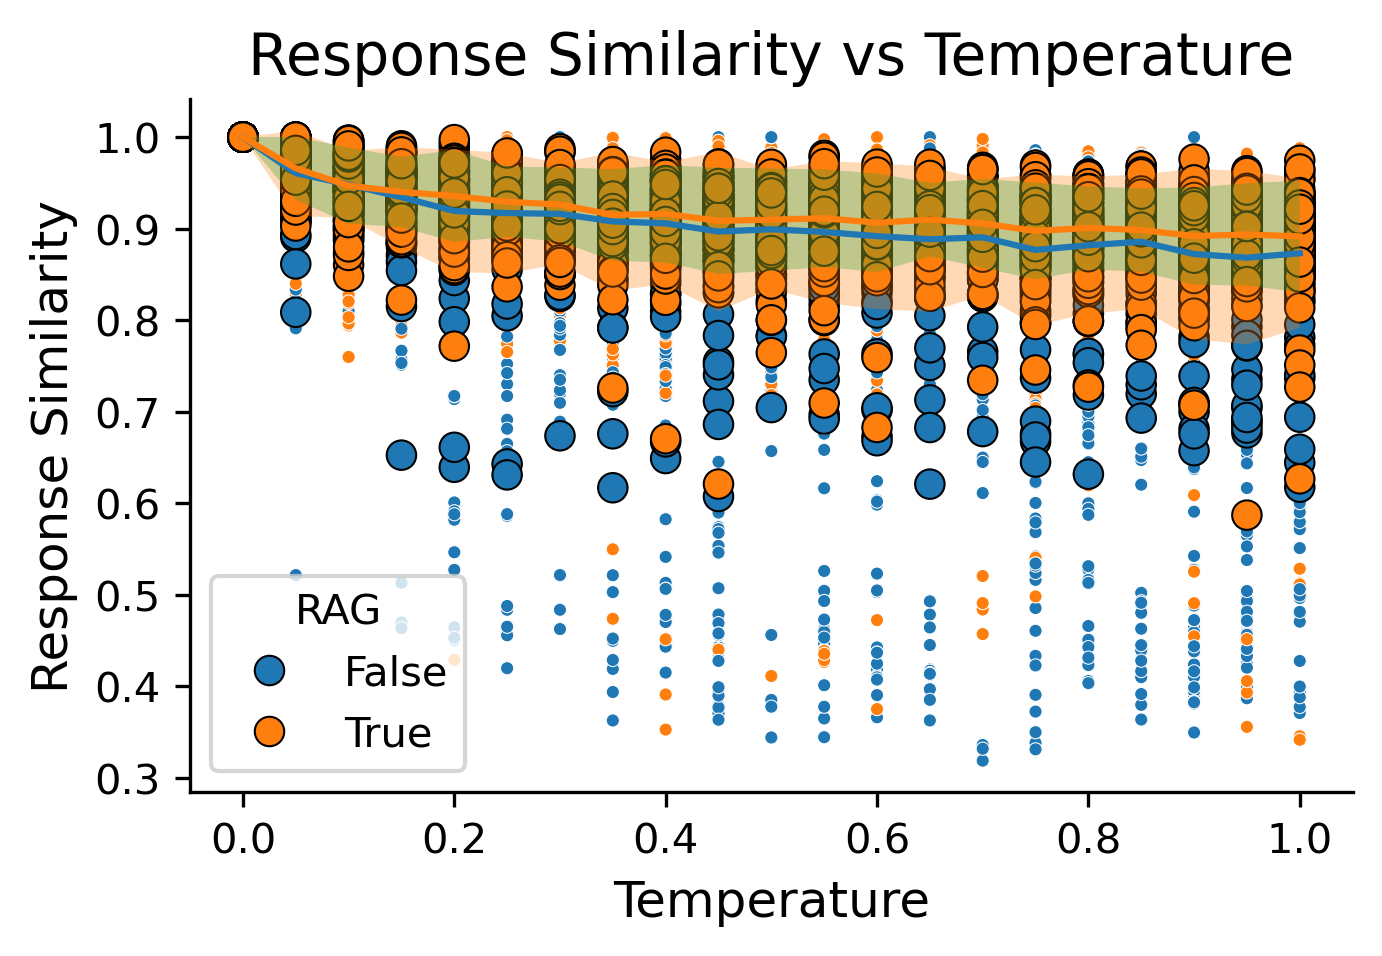

In [60]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=300)
for i in range(10):
    sns.scatterplot(data=dfRes,
                    x='Temperature',
                    y='Rep-' + str(i),
                    s=10,
                    hue='RAG',
                    legend=False,
                    ax=ax)
sns.scatterplot(data=dfRes,
                x='Temperature',
                y='avgSim',
                s=50,
                hue='RAG',
                edgecolor='k',
                linewidth=0.5,
                ax=ax)
agg_df = df_melted.groupby(['Temperature', 'RAG']).agg(
    mean_avgSim=('Error', 'mean'),
    sem_avgSim=('Error', 'std')  # Standard Error of the Mean
).reset_index()
for rag in dfRes['RAG'].unique():
    rag_df = agg_df[agg_df['RAG'] == rag]
    ax.plot(rag_df['Temperature'], rag_df['mean_avgSim'], label=f'Mean RAG {rag}')
    ax.fill_between(rag_df['Temperature'], 
                    rag_df['mean_avgSim'] - rag_df['sem_avgSim'], 
                    rag_df['mean_avgSim'] + rag_df['sem_avgSim'], 
                    alpha=0.3)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:2], labels=labels[:2], title='RAG')
sns.despine()
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Response Similarity', fontsize=12)
plt.title('Response Similarity vs Temperature', fontsize=14)
plt.show()

In [59]:
df_melted

,Temperature,RAG,avgSim,Rep,Error
0,0.0,False,1.000000,Rep-0,1.000000
1,0.0,False,1.000000,Rep-0,1.000000
2,0.0,False,1.000000,Rep-0,1.000000
3,0.0,False,1.000000,Rep-0,1.000000
4,0.0,False,1.000000,Rep-0,1.000000
...,...,...,...,...,...
41995,1.0,True,0.925895,Rep-9,0.980275
41996,1.0,True,0.913703,Rep-9,0.964541
41997,1.0,True,0.916641,Rep-9,0.910155
41998,1.0,True,0.910450,Rep-9,0.870584


In [44]:
dfExp

,prompt,doc-0,doc-1,doc-2,doc-3,doc-4,response-0,response-1,response-2,response-3,response-4,temp,rag
0,Gene regulation is often described from the pe...,"2014 ); however, a central goal of the ﬁeld re...","2014 ); however, a central goal of the ﬁeld re...",complex ways that are difﬁcultto understand us...,the variability it generates between cells\nar...,be leveraged as additional constraints \nto ex...,The state of a cell is a complex and multi-fa...,The state of a cell is a complex and multi-fa...,The state of a cell is a complex and multi-fa...,The state of a cell is a complex and multi-fa...,The state of a cell is a complex and multi-fa...,0.0,True
1,Compare and contrast the utility of dynamical ...,a classical prob-\nlem of control theory (3). ...,"inspired dimension\nreduction via TADs, a natu...",We use this\nmodel to determine a principled w...,reprogramming efﬁciency.\nFuture Prospects for...,accelerate and enhance the efﬁciency of reprog...,The utility of dynamical systems and control ...,The utility of dynamical systems and control ...,The utility of dynamical systems and control ...,The utility of dynamical systems and control ...,The utility of dynamical systems and control ...,0.0,True
2,Synthetic lethality occurs when the knockout o...,(A) allows the organism to tolerate ge-netic v...,and test predictionsabout which combination of...,Review\nSynthetic lethality: General principle...,of the suitability of the protein as atarget f...,than expected based on the com-bination of the...,"Yes, there is a relationship between syntheti...","Yes, there is a relationship between syntheti...","Yes, there is a relationship between syntheti...","Yes, there is a relationship between syntheti...","Yes, there is a relationship between syntheti...",0.0,True
3,The addition of transcription factors have bee...,to survey the effect on gene expres-sion of th...,and rela-tionships are generally lacking. The ...,target regions \nat which many CAPs associate...,"disregulated in cancer, and TFs that mediate s...","and expres-\nsion patterns, underscoring disti...",Transcription factors (TFs) are proteins that...,Transcription factors (TFs) are proteins that...,Transcription factors (TFs) are proteins that...,Transcription factors (TFs) are proteins that...,Transcription factors (TFs) are proteins that...,0.0,True
4,RNAi is used to silence different genes. How l...,two dif-\nferent kinds of DNA in induced gene ...,at the 5\n′end of genes expressed at nc14; thi...,"were activated early (D2–D4, \nfor example, Oc...",transcription is inhibited ( 62). After fertil...,"per cell ( Fig. 2 A ), and DNA FISH shows thes...",The time taken by RNAi to silence genes depen...,The time taken by RNAi to silence genes depen...,The time taken by RNAi to silence genes depen...,The time taken by RNAi to silence genes depen...,The time taken by RNAi to silence genes depen...,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7162,Chromatin conformation capture methods are one...,NaN,NaN,NaN,NaN,NaN,These models could incorporate information ab...,These models could use information from 3C da...,These models can incorporate information from...,These models could incorporate knowledge abou...,These models could incorporate information ab...,1.0,False
7163,I recently completed my Hi-C experiment and ha...,NaN,NaN,NaN,NaN,NaN,There are several common analyses that you ca...,Well done! The mcool files contain all the da...,You can perform a wide range of analyses on y...,There are several standard types of analysis ...,"As a geneticist, you've likely performed vari...",1.0,False
7164,"Often, Hi-C data from chromatin conformation c...",NaN,NaN,NaN,NaN,NaN,The eigenvector is related to the transcripti...,The eigenvector is related to the transcripti...,The eigenvector is related to the underlying ...,The eigenvector of the matrix is closely rela...,The eigenvector is related to the transcripti...,1.0,False
7165,"In nonlinear control theory, there are 

In [9]:
temp = 0.0
NORAGFile = 'EX-11-JUNE-2024-NO-RAG-TEMP-llama2-7b-temp-' + str(temp) + '.csv'
RAGFile   = 'EX-12-JUNE-2024-RAG-TEMP-llama2-7b-temp-' + str(temp) + '.csv'
dfRagTemp = pd.read_csv(RAGFile)
dfNoRagTemp = pd.read_csv(RAGFile)